In [1]:
from math import gcd
from qiskit import execute
from qiskit_aer import Aer

from shor import ShorAlgorithm

In [2]:
shor = ShorAlgorithm()

In [3]:
number = 35

In [4]:
gcd_results = [(i,gcd(i,number)) for i in range(2,number)]
list_of_numbers = [tp[0] for tp in gcd_results if tp[1] == 1]
print(list_of_numbers)

[2, 3, 4, 6, 8, 9, 11, 12, 13, 16, 17, 18, 19, 22, 23, 24, 26, 27, 29, 31, 32, 33, 34]


In [19]:
a = 3
num_qubits_qft = 8

In [20]:
qc = shor.quantum_circuit(number=number, a=a, num_qubits_qft=num_qubits_qft)

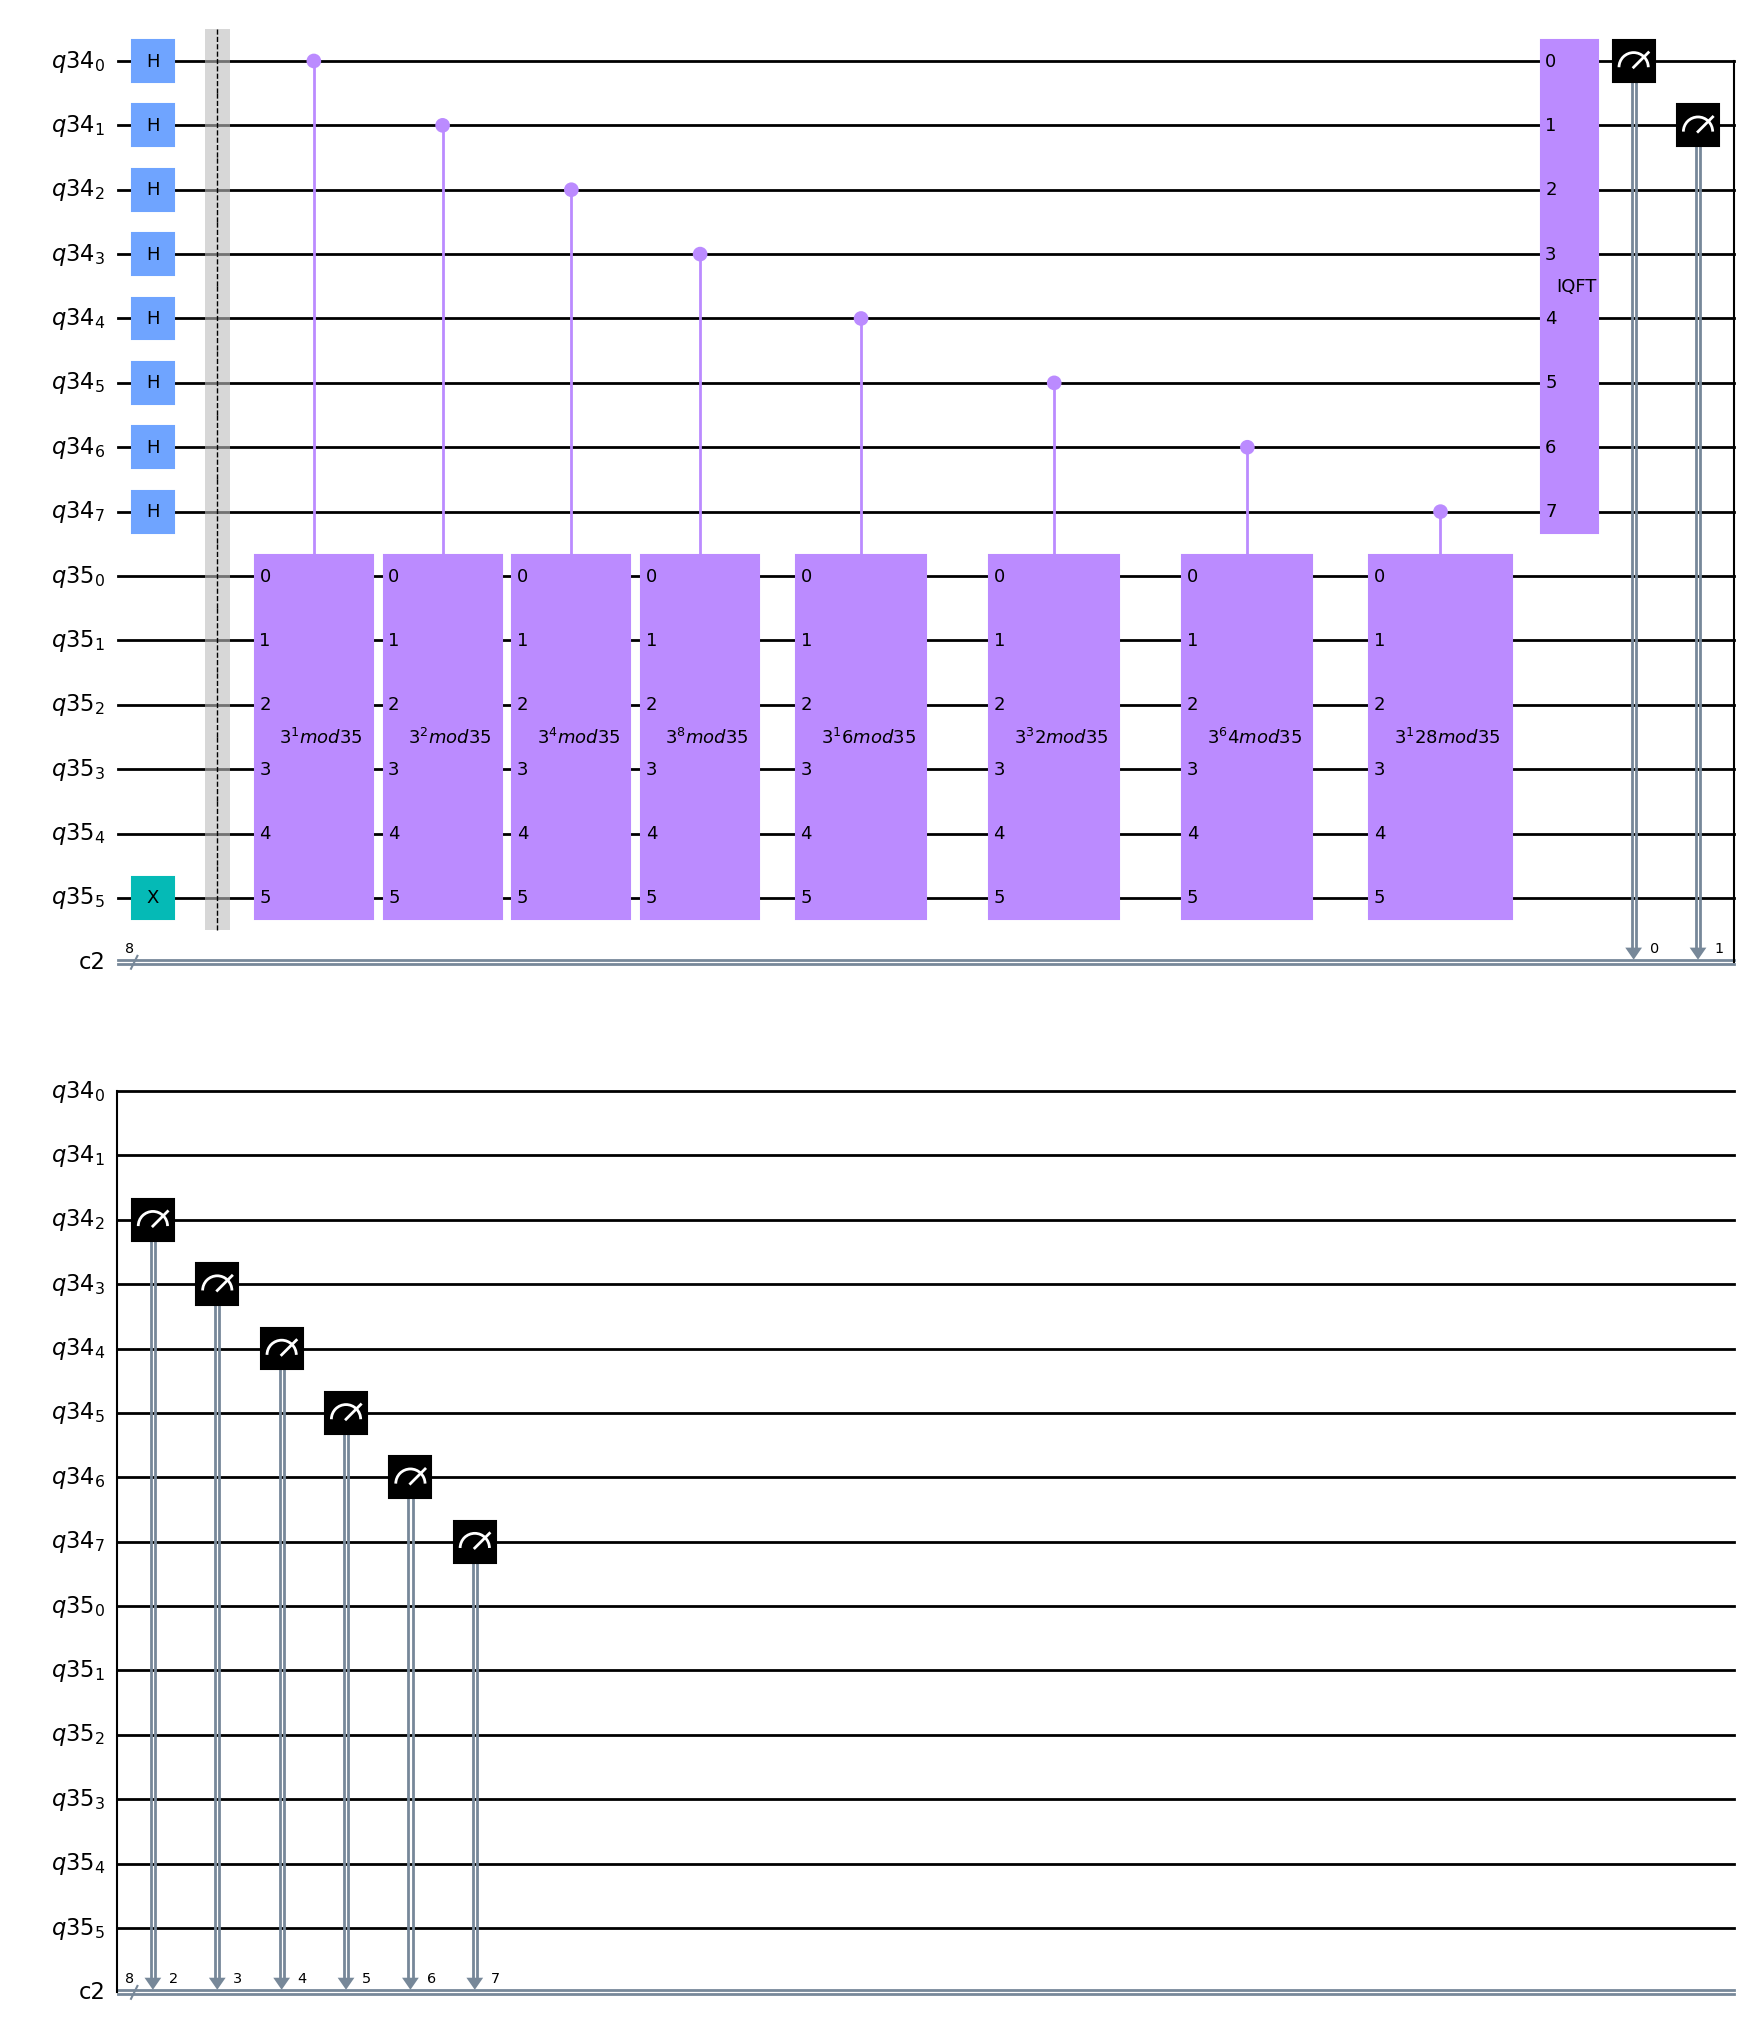

In [21]:
qc.draw(output="mpl")

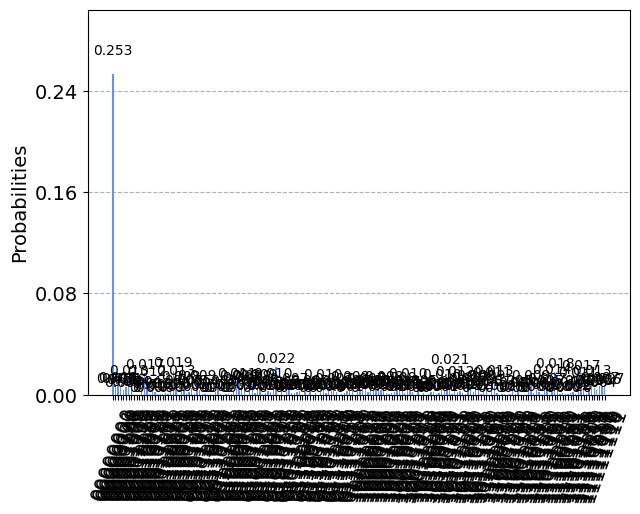

In [22]:
backend = Aer.get_backend("qasm_simulator")
counts = execute(qc, backend=backend, shots=8192).result().get_counts()

In [23]:
df, factors = shor.get_number_prime_factors(number=number, counts=counts)

In [24]:
df

,register_output,phase,fraction,guess_for_r
0,11001111(bin) = 207(dec),0.808594,4/5,5
1,10011110(bin) = 158(dec),0.617188,8/13,13
2,00111000(bin) = 56(dec),0.218750,2/9,9
3,10101100(bin) = 172(dec),0.671875,2/3,3
4,10011100(bin) = 156(dec),0.609375,8/13,13
...,...,...,...,...
183,01111011(bin) = 123(dec),0.480469,7/15,15
184,00011101(bin) = 29(dec),0.113281,1/9,9
185,01000000(bin) = 64(dec),0.250000,1/4,4
186,10001000(bin) = 136(dec),0.531250,8/15,15


In [25]:
factors

{5, 7}